# Filtered-IndoSum Statistics.

# Importing Libraries

In [1]:
import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import nltk

nltk.download('punkt')

# Initialize the random number generator.
np.random.seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# ! mv times-new-roman.ttf /usr/share/fonts/truetype/
# ! fc-cache -f -v

# path = "/usr/share/fonts/truetype/times-new-roman.ttf"
# fontprop = fm.FontProperties(fname=path)
fontprop = fm.FontProperties(family="serif")

# Downloading Dataset

In [3]:
# Download filtered_indosum.tar.gz.
os.system("gdown https://drive.google.com/uc?id=1RbsRMjXplaGTLMdk_vfa5b47gnZHg2y3")
# Extracting filtered_indosum.tar.gz.
! tar -xvf filtered_indosum.tar.gz
! rm filtered_indosum.tar.gz

filtered_indosum/
filtered_indosum/test.05.jsonl
filtered_indosum/test.02.jsonl
filtered_indosum/train.02.jsonl
filtered_indosum/train.04.jsonl
filtered_indosum/train.05.jsonl
filtered_indosum/test.03.jsonl
filtered_indosum/train.01.jsonl
filtered_indosum/dev.04.jsonl
filtered_indosum/test.01.jsonl
filtered_indosum/dev.05.jsonl
filtered_indosum/dev.01.jsonl
filtered_indosum/dev.02.jsonl
filtered_indosum/dev.03.jsonl
filtered_indosum/test.04.jsonl
filtered_indosum/train.03.jsonl


# Get Unique Documents

In [4]:
#######################################
# Get unique data and classify them. #
#####################################
folds = 5
categoryDict = {"tajuk utama":{}, "teknologi":{}, "hiburan":{}, "olahraga":{}, "showbiz":{}, "inspirasi":{}}
for k in range(1, folds+1): # Loop over k.
  for type in ["train", "dev", "test"]: # Loop over types.
    with open(f"filtered_indosum/{type}.0{k}.jsonl") as lines: # Read file.
      for line in lines:
        jsonObj = json.loads(line)        
        categoryDict[jsonObj["category"]][jsonObj["id"]] = jsonObj

total = 0
for value in categoryDict.values():
  total += len(value)
print(f"Number of Unique: {total}")

Number of Unique: 13448


# Length of Articles

In [5]:
def countToken(jsonObj):
  """
  This function counts how many tokens in the document.
  """
  tokenCount = 0
  for paragraph in jsonObj["paragraphs"]: # Loop over paragraphs.
    for sentence in paragraph: # Loop over sentences.
      tokenCount += len(sentence)
  
  return tokenCount

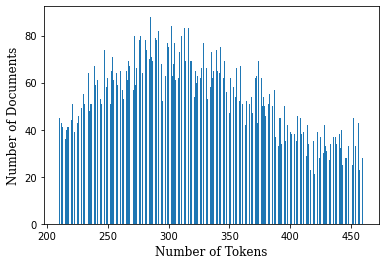

MIN: 210
MAX: 460
MED: 317
AVG: 323
filtered_length.csv


In [6]:
######################
# Length of Article #
####################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over articles.
    tokenCount = countToken(jsonObj) # Count how many tokens.
    aList.append(tokenCount)

fig = plt.figure()
plt.xlabel("Number of Tokens", fontproperties=fontprop, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontprop, fontsize=12)
plt.hist(aList, bins=460)
fig.savefig("filtered-indosum-histogram.pdf", bbox_inches='tight')
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

df = pd.DataFrame({"length":aList})
df.to_csv("filtered_length.csv", index=False)
print("filtered_length.csv")

# Length of Abstractive Summaries

In [7]:
def countAbsSummaryToken(jsonObj):
  """
  This function counts how many tokens in the abstractive summarization of the document.
  """
  tokenCount = 0
  for sentence in jsonObj["summary"]: # Loop over sentences.
    tokenCount += len(sentence)
  
  return tokenCount

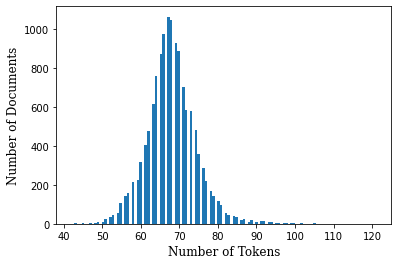

MIN: 42
MAX: 121
MED: 68
AVG: 68
abstractive_length.csv


In [8]:
####################################
# Length of Abstractive Summaries #
##################################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over articles.
    tokenCount = countAbsSummaryToken(jsonObj) # Count how many tokens.
    aList.append(tokenCount)

fig = plt.figure()
plt.xlabel("Number of Tokens", fontproperties=fontprop, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontprop, fontsize=12)
plt.hist(aList, bins=121)
fig.savefig("abstractive-summary-histogram.pdf", bbox_inches='tight')
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

df = pd.DataFrame({"length":aList})
df.to_csv("abstractive_length.csv", index=False)
print("abstractive_length.csv")

# Length of Extractive Summaries

In [9]:
def countExtSummaryToken(jsonObj):
  """
  This function counts how many tokens in the extractive summarization of the document.
  """
  tokenCount = 0
  for labels, paragraph in zip(jsonObj["gold_labels"], jsonObj["paragraphs"]): # Loop over paragraphs.
    for label, sentence in zip(labels, paragraph): # Loop over sentences.
      if label == True or label == "True": # If the sentence is a part of the summary.
        tokenCount += len(sentence)
  
  return tokenCount

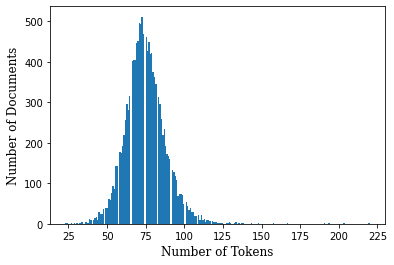

MIN: 23
MAX: 220
MED: 74
AVG: 75
extractive_length.csv


In [10]:
###################################
# Length of Extractive Summaries #
#################################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over articles.
    tokenCount = countExtSummaryToken(jsonObj) # Count the tokens.
    aList.append(tokenCount)

fig = plt.figure()
plt.xlabel("Number of Tokens", fontproperties=fontprop, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontprop, fontsize=12)
plt.hist(aList, bins=220)
fig.savefig("extractive-summary-histogram.pdf", bbox_inches='tight')
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

df = pd.DataFrame({"length":aList})
df.to_csv("extractive_length.csv", index=False)
print("extractive_length.csv")

# Length of Automated Abstractive Summaries

In [11]:
# Download summaries-bert2bert.tsv.
os.system("gdown https://drive.google.com/uc?id=1F5-3hl90ipuYYAxT64_GyrB6103Smr7-")

0

In [12]:
summaryDf = pd.read_csv("summaries-bert2bert.tsv", sep="\t")
summaryDict = {}
for index, row in summaryDf.iterrows():
  summaryDict[row["id"]] = row["summary"]

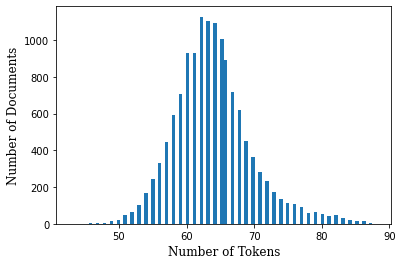

MIN: 43
MAX: 88
MED: 63
AVG: 64
auto_summary_length.csv


In [13]:
##############################################
# Length of Automatic Abstractive Summaries #
############################################

aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over articles.
      summary = summaryDict[jsonObj["id"]]
      tokens = nltk.word_tokenize(summary)
      aList.append(len(tokens))

fig = plt.figure()
plt.xlabel("Number of Tokens", fontproperties=fontprop, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontprop, fontsize=12)
plt.hist(aList, bins=88)
fig.savefig("automatic-summary-histogram.pdf", bbox_inches='tight')
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

df = pd.DataFrame({"length":aList})
df.to_csv("auto_summary_length.csv", index=False)
print("auto_summary_length.csv")

# Match the Truncation with Extractive Summarization

In [14]:
#######################################################
# Match the Truncation with Extractive Summarization #
#####################################################
summaries = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over articles.
    summary = []
    for paragraph, isSummarys in zip(jsonObj["paragraphs"], jsonObj["gold_labels"]): # Loop over paragraphs
      for sentence, isSummary in zip(paragraph, isSummarys): # Loop over sentences
        if isSummary == True or isSummary == "True" or isSummary == 1: # If the sentence is part of the extractive summary.
          summary.extend([True for _ in range(len(sentence))]) # Create token-level "True" labels.
        else: # If the sentence is not part of the extractive summary.
          summary.extend([False for _ in range(len(sentence))]) # Create token-level "False" labels.
    summaries.append(summary)

data = []
for strategy in ["70first", "70middle", "70last", "35first-35middle", "35first-35last", "35middle-35last", "30first-20middle-20last"]: # Loop over strategies.
  hit = 0
  miss = 0
  for summary in summaries: # Loop over summaries.
    if strategy == "70first":
      summary = summary[0:70]
    elif strategy == "70middle":
      length = len(summary)
      start = int(length/2) - int(70/2)
      summary = summary[start:start+70]
    elif strategy == "70last":
      length = len(summary)
      summary = summary[length-70:length]
    elif strategy == "35first-35middle":
      length = len(summary)
      start = int(length/2) - int(35/2)
      firstPart = summary[0:35]
      middlePart = summary[start:start+35]
      summary = firstPart + middlePart
    elif strategy == "35first-35last":
      length = len(summary)
      firstPart = summary[0:35]
      lastPart = summary[length-35:length]
      summary = firstPart + lastPart
    elif strategy == "35middle-35last":
      length = len(summary)
      start = int(length/2) - int(35/2)
      middlePart = summary[start:start+35]
      lastPart = summary[length-35:length]
      summary = middlePart + lastPart
    elif strategy == "30first-20middle-20last":
      length = len(summary)
      start = int(length/2) - int(20/2)
      firstPart = summary[0:30]
      middlePart = summary[start:start+20]
      lastPart = summary[length-20:length]
      summary = firstPart + middlePart + lastPart

    if True in summary: # If at least has 1 intersection.
      hit += 1
    else:
      miss += 1
  
  row = {"strategy":strategy, "hit":hit, "miss":miss, "total":hit+miss}
  data.append(row)

df = pd.DataFrame(data)
df

,strategy,hit,miss,total
0,70first,12988,460,13448
1,70middle,4701,8747,13448
2,70last,1401,12047,13448
3,35first-35middle,12791,657,13448
4,35first-35last,12326,1122,13448
5,35middle-35last,3461,9987,13448
6,30first-20middle-20last,12595,853,13448


# Filtered-IndoSum Data Distribution

In [15]:
#######################################
# Filtered-IndoSum Data Distribution #
#####################################

folds = 5
catDicts = []
for k in range(1, folds+1): # Loop over k.
  totalDict = {"file": "TOTAL", "tajuk utama":0, "olahraga":0, "showbiz":0, "teknologi":0, "hiburan":0, "inspirasi":0, "TOTAL":0}
  for type in ["train", "dev", "test"]: # Loop over types.
    categories = []
    with open(f"filtered_indosum/{type}.0{k}.jsonl") as lines: # Read the file.
      for line in lines:
        jsonObj = json.loads(line)
        categories.append(jsonObj["category"])

    catDict = {"file": f"{type}.0{k}.jsonl", "tajuk utama":0, "teknologi":0, "hiburan":0, "olahraga":0, "showbiz":0, "inspirasi":0, "TOTAL":0}
    for category in categories:
      catDict[category] += 1
      catDict["TOTAL"] += 1
    catDicts.append(catDict)

    for category, count in catDict.items():
      totalDict[category] += count
    totalDict["file"] = "TOTAL"

  catDicts.append(totalDict)

df = pd.DataFrame(catDicts, columns=["file", "tajuk utama", "olahraga", "showbiz", "teknologi", "hiburan", "inspirasi", "TOTAL"])
df.head(20)

,file,tajuk utama,olahraga,showbiz,teknologi,hiburan,inspirasi,TOTAL
0,train.01.jsonl,4210,2717,1550,1259,951,60,10747
1,dev.01.jsonl,261,170,95,77,58,3,664
2,test.01.jsonl,794,511,294,240,183,15,2037
3,TOTAL,5265,3398,1939,1576,1192,78,13448
4,train.02.jsonl,4210,2718,1550,1259,953,62,10752
5,dev.02.jsonl,261,169,95,77,58,3,663
6,test.02.jsonl,794,511,294,240,181,13,2033
7,TOTAL,5265,3398,1939,1576,1192,78,13448
8,train.03.jsonl,4212,2718,1550,1261,953,63,10757
9,dev.03.jsonl,261,169,95,76,58,2,661
